# Enter Data

In [1]:
# Mount your google drive to the colab environment
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/Analyzed_tweets.csv' data.csv

import pandas as pd

df = pd.read_csv('data.csv')

# remove non-English tweets
df = df[df['is_english'] == True]

df = df.sort_values(by='date')

# standardize the time
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

print(df['date'])


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
454   2019-12-16 13:46:20
453   2019-12-17 00:14:05
452   2019-12-17 02:11:19
451   2019-12-17 16:10:34
450   2019-12-18 16:30:36
              ...        
4     2019-12-31 14:00:51
3     2019-12-31 14:36:41
2     2019-12-31 17:04:32
1     2019-12-31 17:11:53
0     2019-12-31 17:27:05
Name: date, Length: 440, dtype: datetime64[ns]


# visualize Emotions Along Time

               Anger   Disgust       Fear        Joy    Sadness   Surprise
date                                                                      
2019-12-16  0.014565  0.003203   0.520543   0.453361   0.001364   0.006964
2019-12-17  0.281896  0.002495   0.262292   2.341064   0.016798   0.095455
2019-12-18  0.271183  0.096370   1.166331   2.830746   0.310822   1.324548
2019-12-19  0.002966  0.000071   0.125618   1.811677   0.003640   0.056029
2019-12-21  0.032140  0.003139   0.633020   1.855158   0.011987   1.464556
2019-12-22  0.092918  0.050331   1.652963   3.745223   0.059428   0.399137
2019-12-23  2.076583  1.372707   9.471297  25.625873   2.616410  13.837130
2019-12-24  7.754588  3.002156  51.214194  71.570859  10.238212  41.219992
2019-12-25  1.737621  0.335966   8.583360  12.711718   0.785917   3.845418
2019-12-26  1.646061  0.742578  11.237401  15.941193   1.395148   4.037620
2019-12-27  2.313881  0.498382   9.199808  16.043431   1.765870   5.178628
2019-12-28  1.810759  0.5

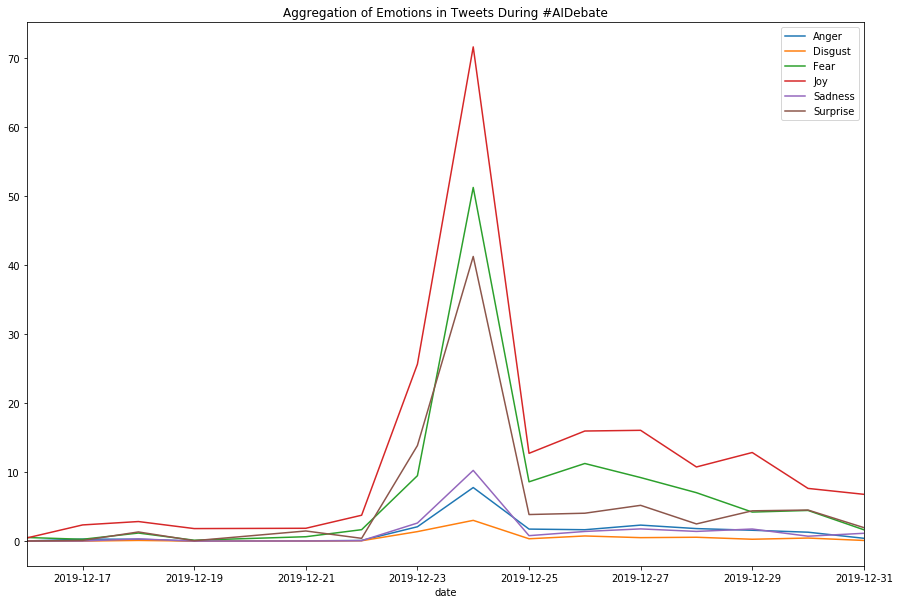

In [2]:
from matplotlib import pyplot as plt 

# resample daily
df2 = df[['date', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise']]
df2.set_index('date')

df3 = df2.groupby(df2['date'].dt.date).sum()

print(df3)


df3.plot(y=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise'], figsize=(15,10), 
         title='Aggregation of Emotions in Tweets During #AIDebate')

# Visualize Polarity of Sentiments

            polarity_of_tweet
date                         
2019-12-16           1.000000
2019-12-17           2.250000
2019-12-18           1.709848
2019-12-19           0.478788
2019-12-21           1.668182
2019-12-22           0.954167
2019-12-23           7.230032
2019-12-24          22.731031
2019-12-25           6.457976
2019-12-26           3.283363
2019-12-27           4.613449
2019-12-28           2.455725
2019-12-29           0.640611
2019-12-30           1.083006
2019-12-31           2.612292


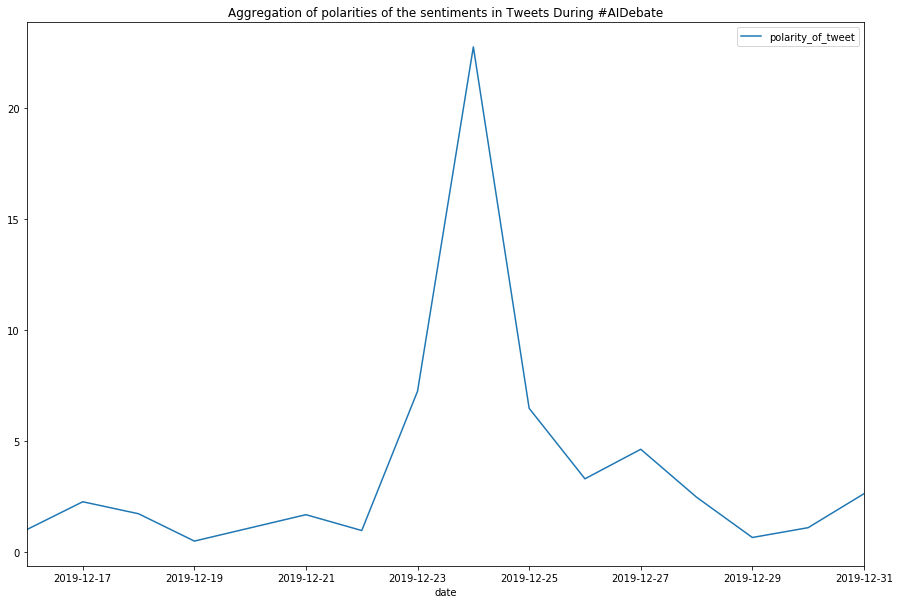

In [3]:

# resample daily
df2 = df[['date', 'polarity_of_tweet']]
df2.set_index('date')

df3 = df2.groupby(df2['date'].dt.date).sum()

print(df3)


df3.plot(y=['polarity_of_tweet'], figsize=(15,10), 
         title='Aggregation of polarities of the sentiments in Tweets During #AIDebate')




# Frequency of Yoshua Bengio & Gary Marcus Names in the Tweets

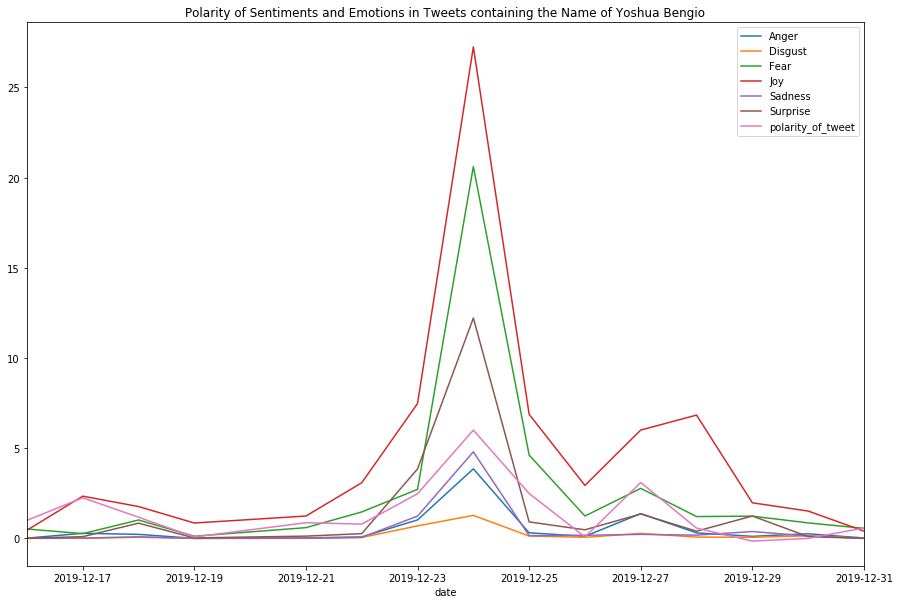

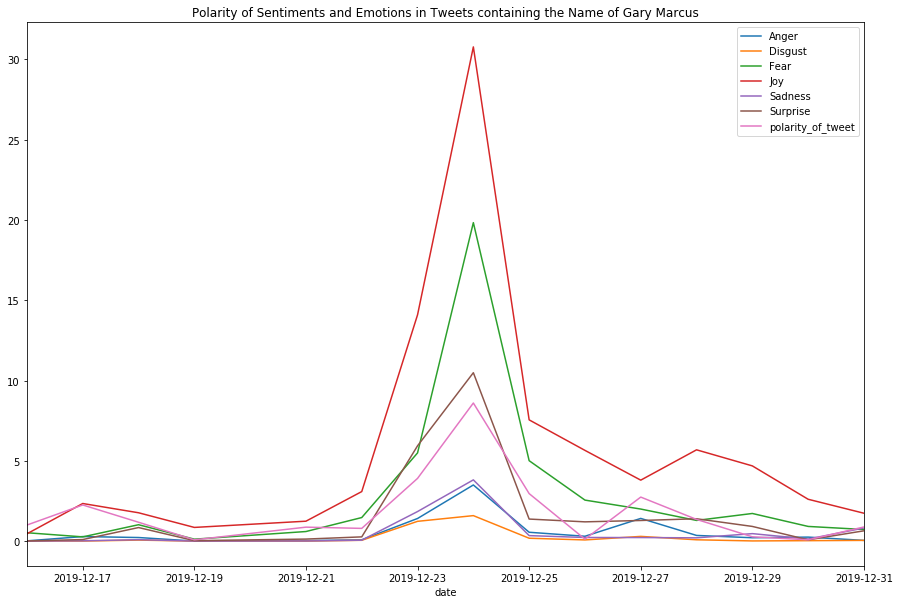

In [4]:
yoshua = df[df['has_yoshua'] == True]
gary = df[df['has_gary'] == True]


####### YOSHUA 
# resample daily
yoshua2 = yoshua[['date', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'polarity_of_tweet']]
yoshua2.set_index('date')


# print(yoshua2)
yoshua2 = yoshua2.groupby(yoshua2['date'].dt.date).sum()

yoshua2.plot(y=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'polarity_of_tweet'], figsize=(15,10), 
         title='Polarity of Sentiments and Emotions in Tweets containing the Name of Yoshua Bengio')


########## GARY
yoshua = df[df['has_yoshua'] == True]
gary = df[df['has_gary'] == True]



# resample daily
gary2 = gary[['date', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'polarity_of_tweet']]
gary2.set_index('date')


# print(gary2)
gary2 = gary2.groupby(gary2['date'].dt.date).sum()

gary2.plot(y=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'polarity_of_tweet'], figsize=(15,10), 
         title='Polarity of Sentiments and Emotions in Tweets containing the Name of Gary Marcus')


# Frequency of terms: "deep learning", "symbols", "hybrid" in tweets

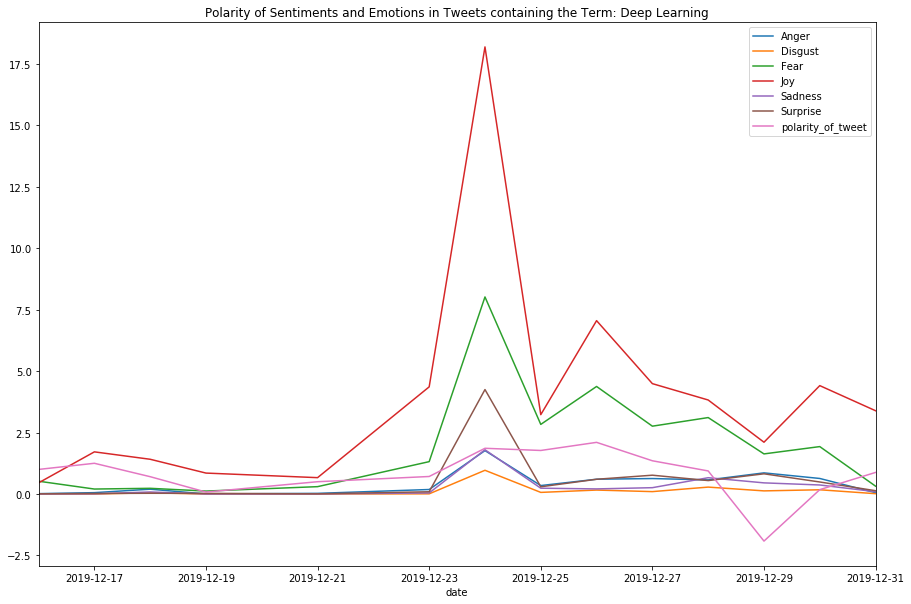

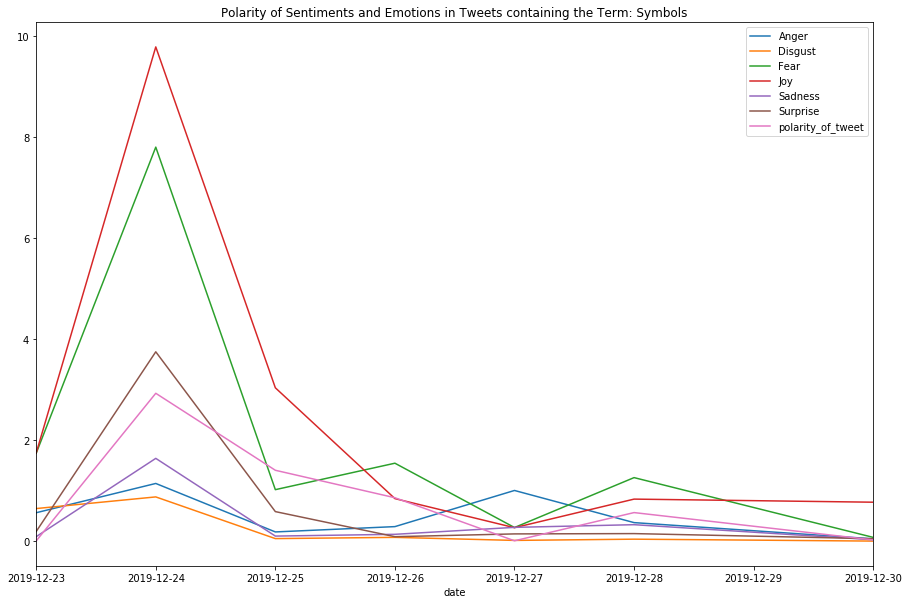

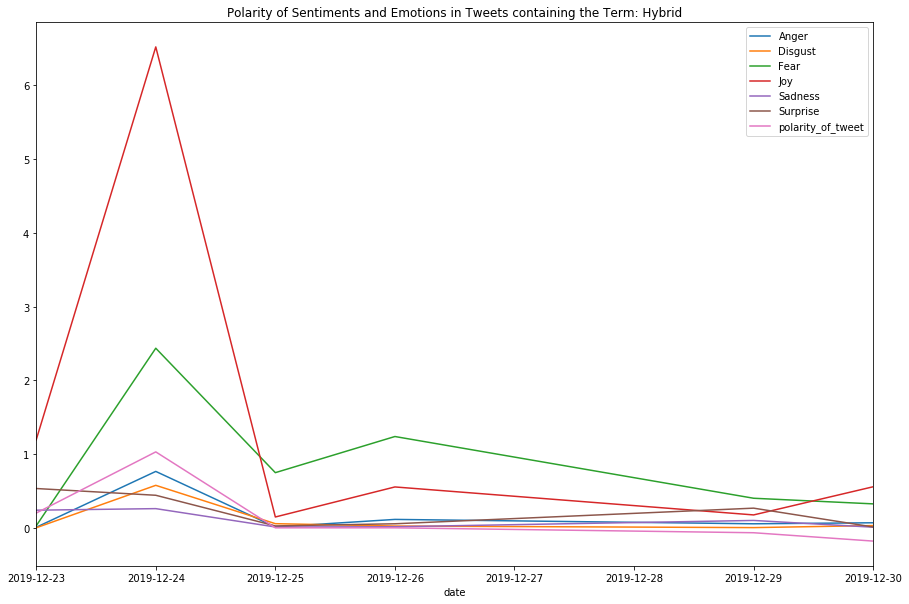

In [5]:
deeplearning = df[df['has_deeplearning'] == True]
symbol = df[df['has_symbol'] == True]
hybrid = df[df['has_hybrid'] == True]


####### DEEP LEARNING 
# resample daily
deeplearning2 = deeplearning[['date', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'polarity_of_tweet']]
deeplearning2.set_index('date')


# print(deeplearning2)
deeplearning2 = deeplearning2.groupby(deeplearning2['date'].dt.date).sum()

deeplearning2.plot(y=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'polarity_of_tweet'], figsize=(15,10), 
         title='Polarity of Sentiments and Emotions in Tweets containing the Term: Deep Learning')


########## symbol
# resample daily
symbol2 = symbol[['date', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'polarity_of_tweet']]
symbol2.set_index('date')


# print(symbol2)
symbol2 = symbol2.groupby(symbol2['date'].dt.date).sum()

symbol2.plot(y=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'polarity_of_tweet'], figsize=(15,10), 
         title='Polarity of Sentiments and Emotions in Tweets containing the Term: Symbols')



########## hybrid
# resample daily
hybrid2 = hybrid[['date', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'polarity_of_tweet']]
hybrid2.set_index('date')


# print(hybrid2)
hybrid2 = hybrid2.groupby(hybrid2['date'].dt.date).sum()

hybrid2.plot(y=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'polarity_of_tweet'], figsize=(15,10), 
         title='Polarity of Sentiments and Emotions in Tweets containing the Term: Hybrid')
